<a href="https://colab.research.google.com/github/gna-rus/Sem4-Pandas-_Intermediate-certification/blob/main/sem4_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [60]:
df1 = pd.read_csv('/content/drive/MyDrive/GB/kc-house-data (1).csv', encoding = 'windows-1251')
df2 = pd.read_csv('/content/drive/MyDrive/GB/laptop_price (1).csv', encoding = 'windows-1251')

In [61]:
# Трансформирую колонку date до юзабельного состояния
df1['new_date'] = df1['date'].apply(lambda row: row[:8]).astype(str)
df1['new_date'] = df1['new_date'].apply(lambda row: pd.to_datetime(row, format='%Y%m%d', errors='coerce'))

# **Task1**

1.2. Изучите стоимости недвижимости





In [62]:
df_price = df1.groupby(df1['price'])[['sqft_living','grade', 'sqft_above', 'yr_built', 'yr_renovated']].agg(['mean', 'min', 'max'])
df_price
# По полученной таблице можно выявить что существует линейная зависемость цены от grade и sqft_living (ее видно даже без построения графиков)

sqft_living               grade         sqft_above              \
                 mean    min    max  mean min max       mean   min   max   
price                                                                      
75000.0         670.0    670    670   3.0   3   3      670.0   670   670   
78000.0         780.0    780    780   5.0   5   5      780.0   780   780   
80000.0         430.0    430    430   4.0   4   4      430.0   430   430   
81000.0         730.0    730    730   5.0   5   5      730.0   730   730   
82000.0         860.0    860    860   6.0   6   6      860.0   860   860   
...               ...    ...    ...   ...  ..  ..        ...   ...   ...   
5350000.0      8000.0   8000   8000  12.0  12  12     6720.0  6720  6720   
5570000.0      9200.0   9200   9200  13.0  13  13     6200.0  6200  6200   
6885000.0      9890.0   9890   9890  13.0  13  13     8860.0  8860  8860   
7062500.0     10040.0  10040  10040  11.0  11  11     7680.0  7680  7680   
7700000.0     12050.0  12050  12050  13.0  13  13     8570.0  8570  8570   

          yr_built             yr_renovated              
              mean   min   max         mean   min   max  
price                                                    
75000.0     1966.0  1966  1966          0.0     0     0  
78000.0     1942.0  1942  1942          0.0     0     0  
80000.0     1912.0  1912  1912          0.0     0     0  
81000.0     1943.0  1943  1943          0.0     0     0  
82000.0     1954.0  1954  1954          0.0     0     0  
...            ...   ...   ...          ...   ...   ...  
5350000.0   2009.0  2009  2009          0.0     0     0  
5570000.0   2001.0  2001  2001          0.0     0     0  
6885000.0   2001.0  2001  2001          0.0     0     0  
7062500.0   1940.0  1940  1940       2001.0  2001  2001  
7700000.0   1910.0  1910  1910       1987.0  1987  1987  

[4028 rows x 15 columns]

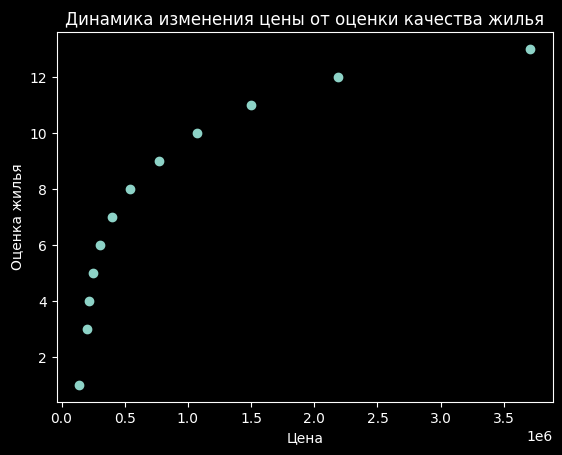

In [63]:
df1_group = df1.groupby('grade').agg({'price':'mean'}).sort_values('price')
plt.title("Динамика изменения цены от оценки качества жилья")
plt.ylabel("Оценка жилья")
plt.xlabel("Цена")

plt.scatter(df1_group['price'], df1_group.index)
# из графика видно что для жилья с оценкой 8-9 имеет смысл вложиться времонт жилья и повысить качество жилья до 11-12 (цена может увеличить в 3 раза). При наличии небольшого бюджета на ремонт то стоит сделать ремонт только ванной комнаты
# при этом в ремонт жилья с оценкой 1-5 вероятно не имеет смысла - есть большие риски не отбить вложенные деньги

1.3. Изучите распределение жилой квадратуры

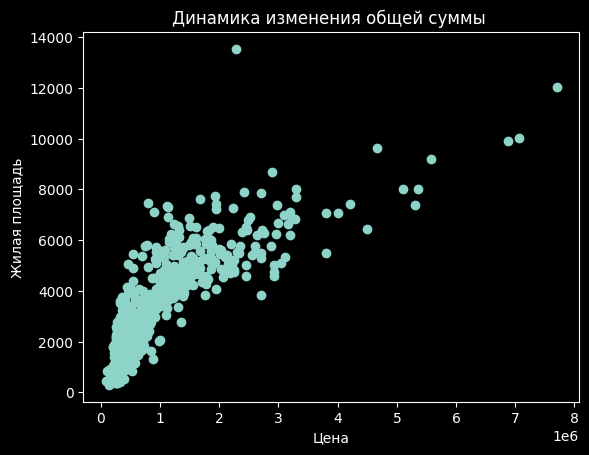

In [64]:
df1_group = df1.groupby('sqft_living').agg({'price':'mean'}).sort_values('price')
plt.title("Динамика изменения общей суммы ")
plt.ylabel("Жилая площадь")
plt.xlabel("Цена")
plt.scatter(df1_group['price'], df1_group.index);
# существует линейная сильная корреляция между жилой площадью и ценой


1.4. Изучите распределение года постройки

In [65]:
df1_group = df1.groupby('yr_built').agg({'price':['min','mean', 'max'], 'grade':'mean', 'sqft_living':'mean'})
df1_group
# Наблюдается что с годами увеличивается качество жилья при этом соотношение цена\жилая площадь не претерпевает радикальных изменений

price                               grade  sqft_living
               min           mean        max      mean         mean
yr_built                                                           
1900      130000.0  581387.206897  1695000.0  6.873563  1732.011494
1901      285000.0  556935.931034  1225000.0  7.034483  1763.620690
1902      260000.0  673007.407407  1990000.0  7.444444  1919.629630
1903      167500.0  480958.195652  1020000.0  6.869565  1507.739130
1904      204995.0  583756.644444  3300000.0  6.911111  1603.177778
...            ...            ...        ...       ...          ...
2011      249000.0  544522.000000  2575000.0  8.184615  2313.684615
2012      160797.0  527447.335294  2000000.0  8.182353  2378.741176
2013      155000.0  678545.452736  3000000.0  8.467662  2636.592040
2014      175003.0  683681.754919  3418800.0  8.559928  2615.389982
2015      230000.0  759785.157895  1999950.0  8.921053  2596.315789

[116 rows x 5 columns]

**Вывод:**

Цена жилья зависет от параметра sqft_living, grade при этом жилье с плохим и средним качеством конструкции и дизайна отличается по цене не сильно (это видно по графику), но это не касается жилья с высоким качеством (цена которого в несколько раз в среднем превышает жилье с средним качеством).

Год постройки не оказывает существенного влияния на цену, но в рамках одного ценового диапазона новые дома имеют более высокое качество жалья и большую жилую площать.

# **Task2**

2.1. Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы.





In [66]:
df_waterfront = df1[df1['waterfront']==1] # создаю дата фрейм с жильем на набережной
df_without_waterfront = df1[df1['waterfront']==0] # создаю дата фрейм с жильем без набережной
price1 = df_waterfront['price'].median()
price2 = df_without_waterfront['price'].median()

<Figure size 2000x800 with 0 Axes>

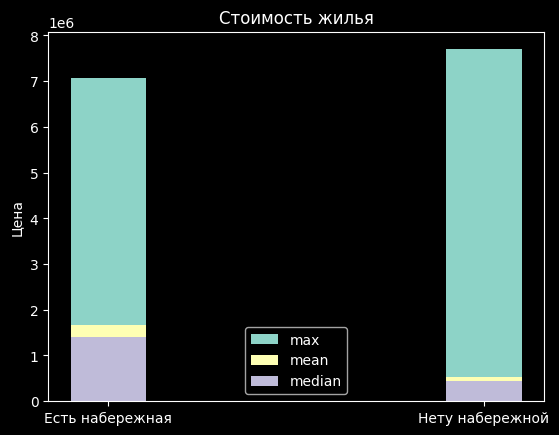

In [67]:
plt.figure(figsize=(20,8))
fig, ax = plt.subplots()
width_df = 0.2
rects1 = ax.bar(['Есть набережная', 'Нету набережной'], [df_waterfront['price'].max() , df_without_waterfront['price'].max()], width_df, label='max')
rects2 = ax.bar(['Есть набережная', 'Нету набережной'], [df_waterfront['price'].mean() , df_without_waterfront['price'].mean()], width_df, label='mean')
rects3 = ax.bar(['Есть набережная', 'Нету набережной'], [df_waterfront['price'].median() , df_without_waterfront['price'].median()], width_df, label='median')
# rects4 = ax.bar(['Есть набережная', 'Нету набережной'], [df_waterfront['price'].min() , df_without_waterfront['price'].min()], width_df, label='min')

plt.ylabel("Цена")
ax.set_title('Cтоимость жилья')
ax.legend();
# На полученном графике видно что средня стоимость жилья на берегу более чем в 2 раза больше чем цена жилья не на берегу

In [68]:
df_waterfront['price'].mean() / df_without_waterfront['price'].mean()  # соотношение средней цены домов расположенных на берегу или нет

3.126391696351833

2.2. Изучите распределение этажей домов

In [69]:
df_price = df1.groupby(df1['floors'])[['price','sqft_living','grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'view']].agg(['mean', 'min', 'max'])
df_price
# Наблюдаю особенность: дома с 2.5 этажами менее популярны чем иное жилье, при том что показатели качества лучше чем у домов с 2 и 3 этажами

price                       sqft_living                  grade  \
                mean       min        max         mean   min    max      mean   
floors                                                                          
1.0     4.421806e+05   75000.0  4668000.0  1731.846161   290   9640  7.148970   
1.5     5.589806e+05   92000.0  3650000.0  1907.880628   490   5530  7.192670   
2.0     6.488912e+05   90000.0  7062500.0  2571.279092   550  10040  8.360272   
2.5     1.060346e+06  255000.0  7700000.0  3145.428571   990  12050  8.894410   
3.0     5.825260e+05  205000.0  3100000.0  1788.311582   760  13540  8.161501   
3.5     9.333125e+05  435000.0  3300000.0  2518.000000  1310   7710  8.375000   

                 sqft_above  ... sqft_basement     yr_built              \
       min max         mean  ...           max         mean   min   max   
floors                       ...                                          
1.0      1  13  1331.197191  ...          4820  1960.400843  1900  2014   
1.5      4  11  1646.653403  ...          1800  1935.107330  1900  2015   
2.0      5  13  2398.800631  ...          3260  1990.720908  1900  2015   
2.5      6  13  2789.857143  ...          3480  1961.310559  1900  2014   
3.0      7  12  1719.391517  ...          4130  2004.846656  1909  2015   
3.5      7  12  2315.500000  ...          1620  1990.625000  1904  2008   

       yr_renovated                view          
               mean min   max      mean min max  
floors                                           
1.0       73.971723   0  2015  0.213577   0   4  
1.5      143.146597   0  2015  0.249738   0   4  
2.0       86.009586   0  2015  0.248149   0   4  
2.5      223.503106   0  2014  0.509317   0   4  
3.0       26.050571   0  2014  0.285481   0   4  
3.5        0.000000   0     0  0.500000   0   2  

[6 rows x 24 columns]

In [70]:
df1.groupby(df1['floors'])['id'].agg('count') # распределяю количество домов по этажам

floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: id, dtype: int64

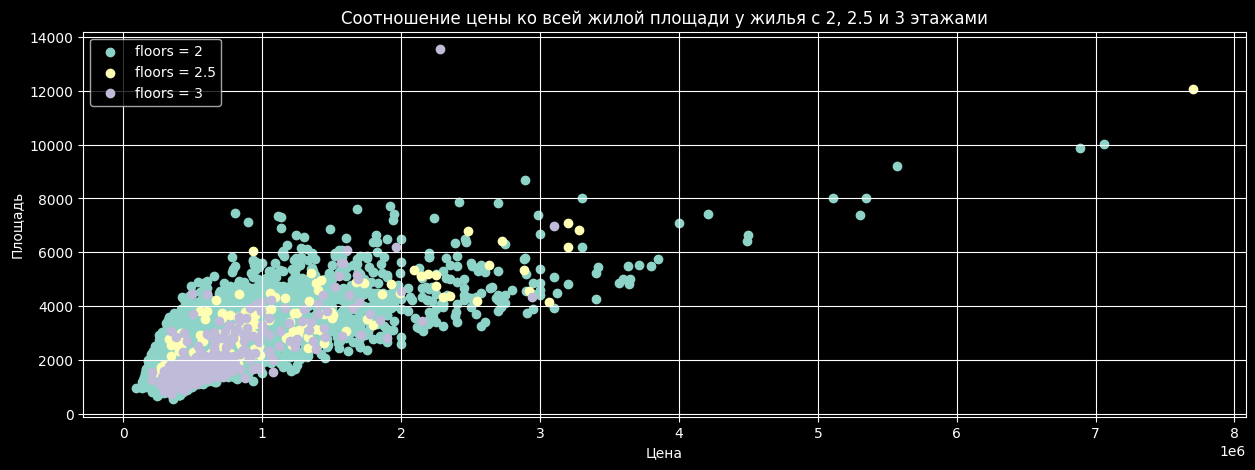

In [71]:
fig, ax = plt.subplots(figsize=(15, 5))
# создаю датафрейм с жильем у которого только 2.5 этажа
df1_floors_25_price = df1[(df1['floors'] == 2.5)]['price']
df1_floors_25_sqft_living = df1[df1['floors'] == 2.5]['sqft_living']

# создаю датафрейм с жильем у которого только 2 этажа
df1_floors_2_price = df1[df1['floors'] == 2.0]['price']
df1_floors_2_sqft_living = df1[df1['floors'] == 2.0]['sqft_living']

# создаю датафрейм с жильем у которого только 3 этажа
df1_floors_3_price = df1[df1['floors'] == 3.0]['price']
df1_floors_3_sqft_living = df1[df1['floors'] == 3.0]['sqft_living']

plt.scatter(df1_floors_2_price, df1_floors_2_sqft_living,  label='floors = 2')
plt.scatter(df1_floors_25_price, df1_floors_25_sqft_living,  label='floors = 2.5')
plt.scatter(df1_floors_3_price, df1_floors_3_sqft_living,  label='floors = 3')

plt.xlabel("Цена")
plt.ylabel("Площадь")
ax.set_title('Соотношение цены ко всей жилой площади у жилья с 2, 2.5 и 3 этажами')

plt.grid()
ax.legend();
# из графика видно что жилье с 2.5 этажами в имеет примерно одинаковое цену в основном в сравнении с жильем с 2 и 3 этажами
# предположительно ошибка возникла из-за небольшой выборки среди жилья с 2.5 этажами и из-за отсутствия элитного жилья с 2.5 этажами (которые могли бы сильно повысить среднюю стоимость жилья с 2.5 этажами)

2.3. Изучите распределение состояния домов

In [72]:
df1_correct = df1[df1['yr_renovated']>1900] # отсеиваю дома с некорректной датой реновации
df_price = df1_correct.groupby(df1['grade'])[['price','sqft_living', 'floors', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'view']].agg('mean')
df_price

,price,sqft_living,floors,sqft_above,sqft_basement,yr_built,yr_renovated,view
grade,,,,,,,,
4,3.300000e+05,520.000000,1.000000,520.000000,0.000000,1924.000000,1980.000000,0.000000
5,2.329783e+05,1053.333333,1.000000,865.000000,188.333333,1937.166667,1989.166667,0.000000
6,3.096966e+05,1363.649485,1.134021,1166.329897,197.319588,1935.216495,1987.587629,0.164948
7,4.871210e+05,1843.020833,1.379464,1540.818452,302.202381,1936.419643,1992.836310,0.241071
8,7.676190e+05,2440.222642,1.611321,1979.241509,460.981132,1940.166038,1998.845283,0.720755
9,1.142065e+06,3057.869565,1.728261,2372.057971,685.811594,1943.702899,2001.500000,1.050725
10,1.578940e+06,3490.200000,1.880000,2799.800000,690.400000,1947.020000,2000.960000,1.620000
11,2.526726e+06,4860.000000,1.900000,3713.333333,1146.666667,1959.200000,1997.133333,1.866667
12,2.628500e+06,6290.000000,1.666667,4683.333333,1606.666667,1968.666667,1994.666667,4.000000


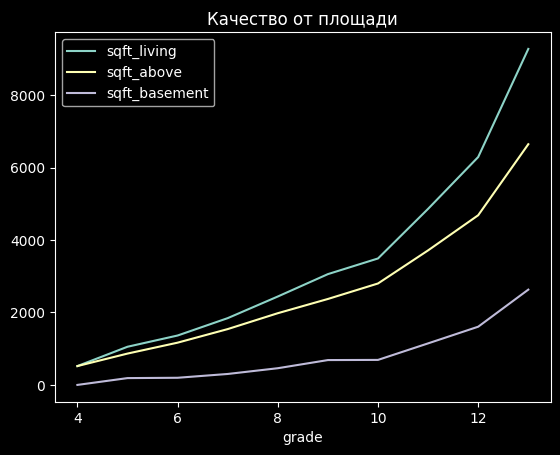

In [73]:
df_price[['sqft_living', 'sqft_above', 'sqft_basement']].plot(legend= True)
plt.title('Качество от площади');

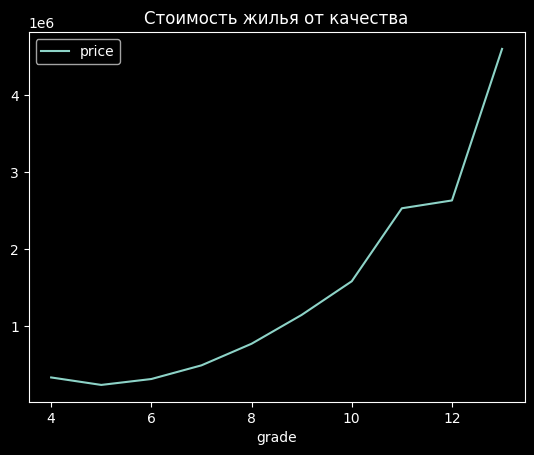

In [74]:
df_price['price'].plot(legend= True)
plt.title('Cтоимость жилья от качества');

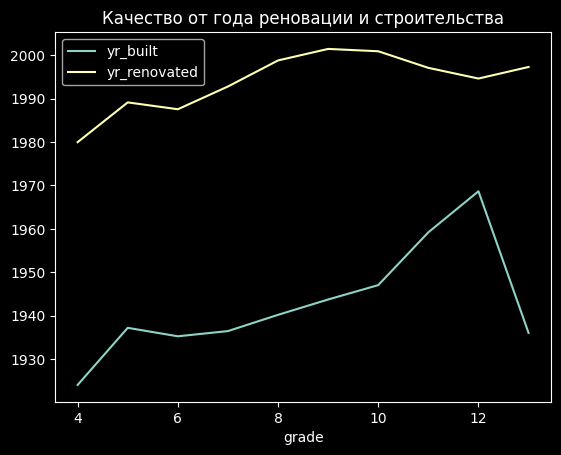

In [75]:
df_price[['yr_built', 'yr_renovated']].plot(legend= True)
plt.title('Качество от года реновации и строительства');
# падение в правой части графика обусловлено малой выборкой жилья с grade = 12

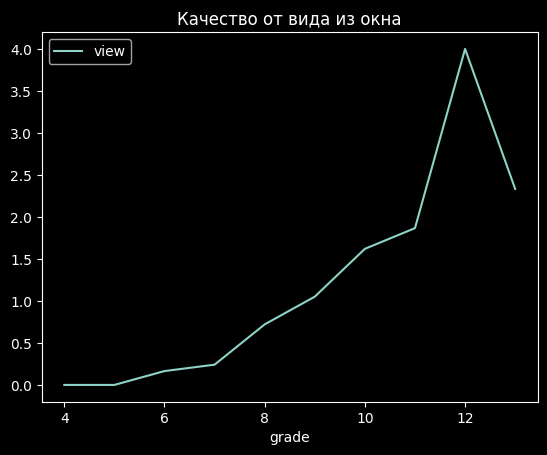

In [76]:
df_price['view'].plot(legend= True)
plt.title('Качество от вида из окна');
# падение в правой части графика обусловлено малой выборкой grade = 12

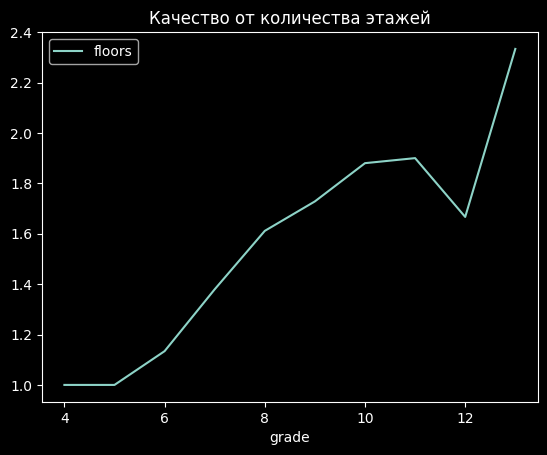

In [77]:
df_price['floors'].plot(legend= True)
plt.title('Качество от количества этажей');

Вывод:

Выявлено, что дома на берегу, в среднем дороже более чем в 3 раза.

Сводная таблица показала, что дома с 2.5 этажами сильно дешевле домов с 2 и 3 за при одинаковой средней жилой площади. Однако график выявил что это ошибочное суждение и цены за единицу жилой площади в зависемости от количества этажей у жилья распределены примерно одинаково.

Качества жилья зависет от жилой площади (при этом помещения ниже уровня земли мало оказывают на качество жилья), вида из окна, количества этажей. Наименьшее качество у жилья построенные до 1940 года.

# **Task3**


3.3 Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [78]:
df_price = df1.groupby(df1['price'])[['grade','sqft_living', 'floors', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'view', 'waterfront']].agg('mean')
df_price
# По сводной таблице можно предположить что основное влияние из числовых параметров оказывает grade и sqft_living. Так же наблюдается влияние sqft_basement и view

,grade,sqft_living,floors,sqft_above,sqft_basement,yr_built,yr_renovated,view,waterfront
price,,,,,,,,,
75000.0,3.0,670.0,1.0,670.0,0.0,1966.0,0.0,0.0,0.0
78000.0,5.0,780.0,1.0,780.0,0.0,1942.0,0.0,0.0,0.0
80000.0,4.0,430.0,1.0,430.0,0.0,1912.0,0.0,0.0,0.0
81000.0,5.0,730.0,1.0,730.0,0.0,1943.0,0.0,0.0,0.0
82000.0,6.0,860.0,1.0,860.0,0.0,1954.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5350000.0,12.0,8000.0,2.0,6720.0,1280.0,2009.0,0.0,4.0,0.0
5570000.0,13.0,9200.0,2.0,6200.0,3000.0,2001.0,0.0,0.0,0.0
6885000.0,13.0,9890.0,2.0,8860.0,1030.0,2001.0,0.0,4.0,0.0


In [79]:
# Создаю матрицу линейно
df_for_corr = df1[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
df_for_corr = df_for_corr.corr()


<Axes: >

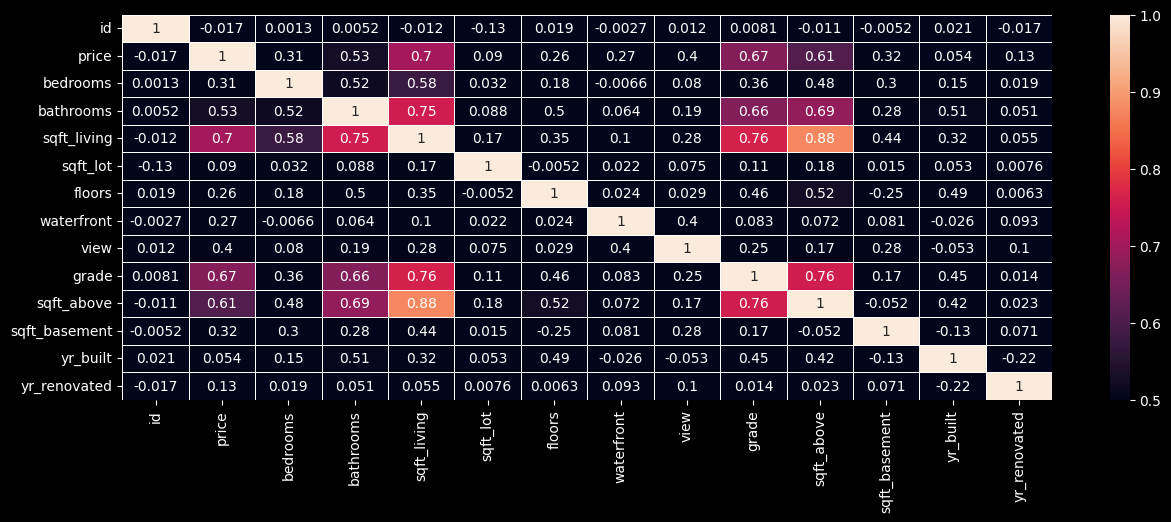

In [80]:
# Создаю визуализацию корреляции через хитмап
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_for_corr, annot=True, linewidths=0.5, vmin=0.5)
# По корреляции видно что самое большое влияние на цену оказывает sqft_living и grade.
# А на grade влияние оказывает bathrooms, bedrooms, sqft_above и sqft_living.
# Отсюда делается наблюдение что sqft_living влияет наибольшим образом на стоимость жилья (площадь подвала и дата строительства и реновации - оказавают малое влияние на итоговую цену).

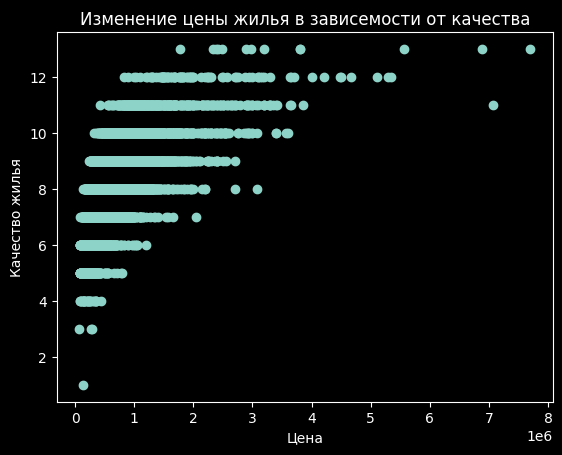

In [81]:
df_price_x = df1['price']
df_price_y = df1['grade']
plt.title("Изменение цены жилья в зависемости от качества")
plt.ylabel("Качество жилья")
plt.xlabel("Цена")
plt.scatter(df_price_x, df_price_y);

Text(0.5, 0, 'Качество жилья')

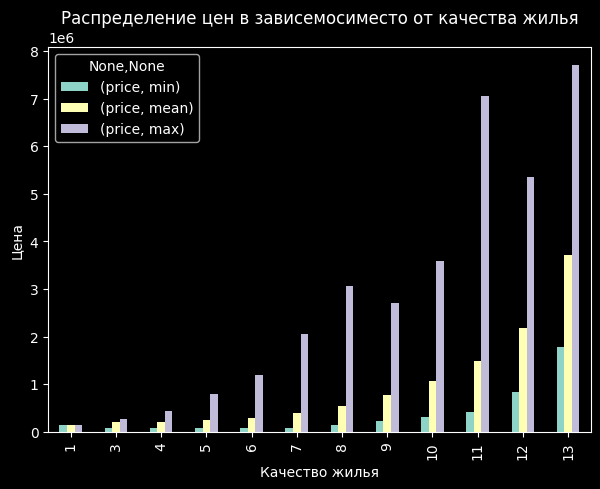

In [82]:
df_price1 = df1.groupby(df1['grade'])[['price']].agg(['min', 'mean', 'max']).plot(kind='bar',figsize=(7,5))
plt.title("Распределение цен в зависемосиместо от качества жилья")
plt.ylabel("Цена")
plt.xlabel("Качество жилья")

# Полученным двум графикам видно что изменение цены и качества происходит не линейно, а также присутствуют сильные корреляции макисмальной цены в зависемости от качества,
# чего нельзя наблюдать для соотношения средняя цена и качество жильяb

Text(0.5, 0, 'Жилая площадь')

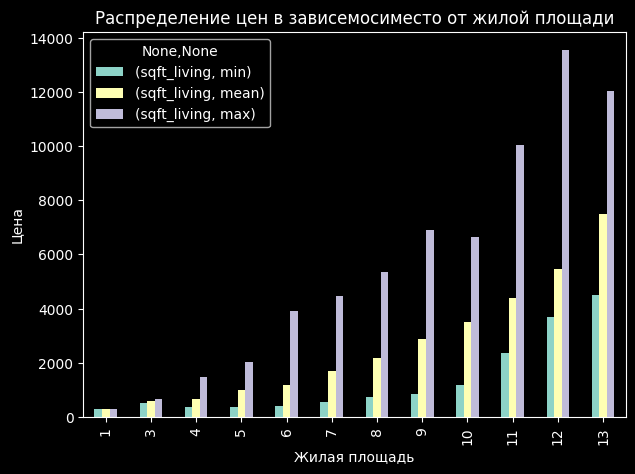

In [83]:
df_price1 = df1.groupby(df1['grade'])[['sqft_living']].agg(['min', 'mean', 'max']).plot(kind='bar',figsize=(7,5))
plt.title("Распределение цен в зависемосиместо от жилой площади")
plt.ylabel("Цена")
plt.xlabel("Жилая площадь")
# Наблюдается анамалия для grade 9 и 12 качеством, так как максимальная цена жилья падает а жилая площадь ростет waterfront

In [84]:
df_price = df1.groupby(df1['waterfront']).agg({'sqft_living': ['min', 'mean', 'max', 'count'], 'price':['mean', 'median'], 'grade':'mean', 'view':'mean'})
df_price
# По сводной таблице видно насколько улучшается вид от расположения жилья (у воды или нет)
# из-за того что количества жилья на берегу меньше, по параметру mean нельзя считать что жилье без выхода к воде стои дороже и это параметр median указывает что насколько жилье ороже с доступом к воде.
# По минимальному значению sqft_living предполагаю что все жилье на берегу - можно отнести к элитному (они все большие по площади), но так как количество земли на берегу ограничено - из-за этого максимальная жилая площадь меньше у жилья на берегу

sqft_living                                    price             \
                   min         mean    max  count          mean     median   
waterfront                                                                   
0                  290  2071.587972  13540  21450  5.315636e+05   450000.0   
1                  440  3173.687117  10040    163  1.661876e+06  1400000.0   

               grade      view  
                mean      mean  
waterfront                      
0           7.648392  0.207459  
1           8.773006  3.766871

<Figure size 2000x800 with 0 Axes>

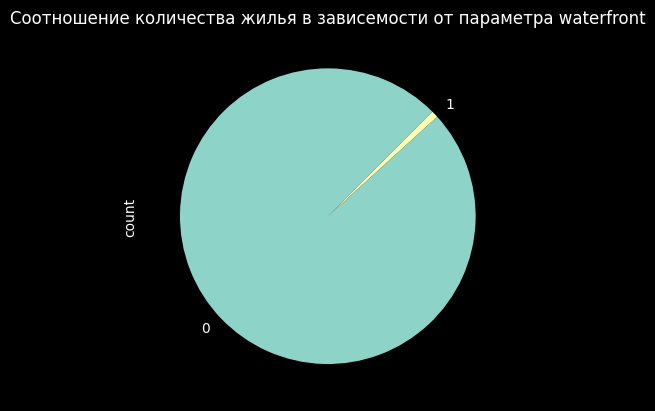

In [85]:
plt.figure(figsize=(20,8))
fig, ax = plt.subplots()
labels = ['waterfront=0', 'waterfront=1']
df_pie = df_price['sqft_living']['count'].plot.pie(subplots=True, figsize=(5, 5), startangle=45)
plt.title("Соотношение количества жилья в зависемости от параметра waterfront")
plt.show();
# По графику становится ясно почему существует такая большая разница между жилья с выходом к воде и без него в цене - количество предложений на рынке ограничено

In [143]:
df_price = df1.groupby(df1['view']).agg({'sqft_living': ['mean', 'count'], 'price':['mean', 'median'], 'grade':'mean'})

df_price
# Создаю сводную таблицу по виду. Видно что в местах с хорошим видом стараются строить более комфортабельное жилье больших размеров чем в других местах,
# что приводит к сильному росту цен на такое жилье


sqft_living                price                grade
             mean  count          mean     median      mean
view                                                       
0     1997.761660  19489  4.965642e+05   432500.0  7.564780
1     2568.960843    332  8.122808e+05   690944.0  8.117470
2     2655.257529    963  7.924009e+05   675000.0  8.320872
3     3018.564706    510  9.719653e+05   802500.0  8.733333
4     3351.473354    319  1.463711e+06  1185000.0  9.078370

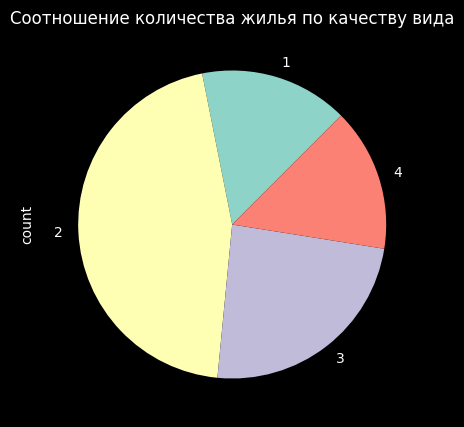

In [144]:
new_df_price = df_price['sqft_living']['count']
new_df_price = new_df_price[1:]
new_df_price.plot.pie(subplots=True, figsize=(5, 5), startangle=45)

plt.title("Соотношение количества жилья по качеству вида")
plt.show();
# Жилье со значение view=0 на графике не отображается так как такого жилья болье чем всех остальных вместе взятых

# **Вывод:**


В результате можно сделать следующие суждения о влиянии на цену за жилье различных параметров:

**sqft_living** - оказывает наибольшее влияние на цену среди всех видов площадей жилья

**grade** - оказывает большое влияние на цену, зависет от показателей жилой площади выше уровня земли и от количества ванных комнат

**waterfront** - жилье с выходом к воде стоит сильно больше, из-за ограниченности предложений на рынке

**view** - большая часть предложений на рынке имеют плохой вид из окна, но жилье с view=4 в 3 раза дороже жилья view=0, при том что у view=4 средня площадь больше в 1,5 раза а вид из окна в 1.2 раза (9 баллов против 7.5)